In [32]:
import pandas as pd
import numpy as np
import datetime as dt

In [33]:
df=pd.read_csv(r"C:\Users\srika\OneDrive\Documents\Kaggle_Projects\Kaggle_19_Call_Center_Data\Call Center Data.csv")
df

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,1,217,204,94.01%,13,0:00:17,0:02:14,0:02:45,76.28%
1,2,200,182,91.00%,18,0:00:20,0:02:22,0:06:55,72.73%
2,3,216,198,91.67%,18,0:00:18,0:02:38,0:03:50,74.30%
3,4,155,145,93.55%,10,0:00:15,0:02:29,0:03:12,79.61%
4,5,37,37,100.00%,0,0:00:03,0:02:06,0:00:35,97.30%
...,...,...,...,...,...,...,...,...,...
1246,1247,191,184,96.34%,7,0:00:07,0:02:50,0:01:56,92.55%
1247,1248,212,209,98.58%,3,0:00:10,0:02:51,0:01:45,89.10%
1248,1249,210,203,96.67%,7,0:00:12,0:03:22,0:03:52,85.24%
1249,1250,167,159,95.21%,8,0:00:16,0:03:16,0:02:42,83.03%


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Index                       1251 non-null   int64 
 1   Incoming Calls              1251 non-null   int64 
 2   Answered Calls              1251 non-null   int64 
 3   Answer Rate                 1251 non-null   object
 4   Abandoned Calls             1251 non-null   int64 
 5   Answer Speed (AVG)          1251 non-null   object
 6   Talk Duration (AVG)         1251 non-null   object
 7   Waiting Time (AVG)          1251 non-null   object
 8   Service Level (20 Seconds)  1251 non-null   object
dtypes: int64(4), object(5)
memory usage: 88.1+ KB


In [35]:
df.shape

(1251, 9)

In [36]:
df.duplicated().sum()

0

In [37]:
df.describe()

,Index,Incoming Calls,Answered Calls,Abandoned Calls
count,1251.000000,1251.000000,1251.000000,1251.000000
mean,626.000000,198.539568,176.845723,21.693845
std,361.276902,156.534195,115.612080,59.671955
min,1.000000,5.000000,5.000000,0.000000
25%,313.500000,123.000000,114.000000,3.000000
50%,626.000000,177.000000,166.000000,8.000000
75%,938.500000,233.000000,214.500000,16.000000
max,1251.000000,1575.000000,909.000000,704.000000


In [38]:
df=df.drop(['Index'],axis=1)
df

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217,204,94.01%,13,0:00:17,0:02:14,0:02:45,76.28%
1,200,182,91.00%,18,0:00:20,0:02:22,0:06:55,72.73%
2,216,198,91.67%,18,0:00:18,0:02:38,0:03:50,74.30%
3,155,145,93.55%,10,0:00:15,0:02:29,0:03:12,79.61%
4,37,37,100.00%,0,0:00:03,0:02:06,0:00:35,97.30%
...,...,...,...,...,...,...,...,...
1246,191,184,96.34%,7,0:00:07,0:02:50,0:01:56,92.55%
1247,212,209,98.58%,3,0:00:10,0:02:51,0:01:45,89.10%
1248,210,203,96.67%,7,0:00:12,0:03:22,0:03:52,85.24%
1249,167,159,95.21%,8,0:00:16,0:03:16,0:02:42,83.03%


In [39]:
df.dtypes

Incoming Calls                 int64
Answered Calls                 int64
Answer Rate                   object
Abandoned Calls                int64
Answer Speed (AVG)            object
Talk Duration (AVG)           object
Waiting Time (AVG)            object
Service Level (20 Seconds)    object
dtype: object

In [40]:
df=df
#converting to datetime values
df['Answer Speed (AVG)']=pd.to_datetime(df['Answer Speed (AVG)'])
df['Talk Duration (AVG)']=pd.to_datetime(df['Talk Duration (AVG)'])
df['Waiting Time (AVG)']=pd.to_datetime(df['Waiting Time (AVG)'])

#Converting datetime values into decimals in order to perform statistical calculations
df['Answer Speed (AVG)']=df['Answer Speed (AVG)'].dt.hour * 60 + df['Answer Speed (AVG)'].dt.minute + df['Answer Speed (AVG)'].dt.second/60
df['Talk Duration (AVG)']=df['Talk Duration (AVG)'].dt.hour * 60 + df['Talk Duration (AVG)'].dt.minute + df['Talk Duration (AVG)'].dt.second/60
df['Waiting Time (AVG)']=df['Waiting Time (AVG)'].dt.hour * 60 + df['Waiting Time (AVG)'].dt.minute + df['Waiting Time (AVG)'].dt.second/60

df.dtypes

Incoming Calls                  int64
Answered Calls                  int64
Answer Rate                    object
Abandoned Calls                 int64
Answer Speed (AVG)            float64
Talk Duration (AVG)           float64
Waiting Time (AVG)            float64
Service Level (20 Seconds)     object
dtype: object

In [41]:
# converting Answer rate & Service level to float from object
df['Answer Rate']=df['Answer Rate'].str.replace('%','')
df['Service Level (20 Seconds)']=df['Service Level (20 Seconds)'].str.replace('%','')
df['Answer Rate']=df['Answer Rate'].astype(float)
df['Service Level (20 Seconds)']=df['Service Level (20 Seconds)'].astype(float)

df.dtypes

Incoming Calls                  int64
Answered Calls                  int64
Answer Rate                   float64
Abandoned Calls                 int64
Answer Speed (AVG)            float64
Talk Duration (AVG)           float64
Waiting Time (AVG)            float64
Service Level (20 Seconds)    float64
dtype: object

In [42]:
df.head(10)

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217,204,94.01,13,0.283333,2.233333,2.750000,76.28
1,200,182,91.00,18,0.333333,2.366667,6.916667,72.73
2,216,198,91.67,18,0.300000,2.633333,3.833333,74.30
3,155,145,93.55,10,0.250000,2.483333,3.200000,79.61
4,37,37,100.00,0,0.050000,2.100000,0.583333,97.30
5,315,304,96.51,11,0.300000,1.583333,2.616667,77.17
6,252,244,96.83,8,0.216667,1.833333,2.033333,82.00
7,213,205,96.24,8,0.166667,2.166667,3.366667,88.10
8,219,200,91.32,19,0.250000,2.300000,6.200000,79.45
9,371,348,93.80,23,0.316667,1.666667,3.483333,73.63


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Incoming Calls              1251 non-null   int64  
 1   Answered Calls              1251 non-null   int64  
 2   Answer Rate                 1251 non-null   float64
 3   Abandoned Calls             1251 non-null   int64  
 4   Answer Speed (AVG)          1251 non-null   float64
 5   Talk Duration (AVG)         1251 non-null   float64
 6   Waiting Time (AVG)          1251 non-null   float64
 7   Service Level (20 Seconds)  1251 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 78.3 KB


In [44]:
df.describe()

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
count,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000
mean,198.539568,176.845723,92.692518,21.693845,0.414961,2.625859,3.871916,70.872910
std,156.534195,115.612080,8.460895,59.671955,0.395284,0.395051,3.177466,18.452803
min,5.000000,5.000000,22.100000,0.000000,0.033333,0.950000,0.050000,0.000000
25%,123.000000,114.000000,91.350000,3.000000,0.216667,2.366667,1.966667,60.210000
50%,177.000000,166.000000,94.930000,8.000000,0.350000,2.616667,3.033333,74.140000
75%,233.000000,214.500000,97.240000,16.000000,0.500000,2.850000,4.600000,84.140000
max,1575.000000,909.000000,100.000000,704.000000,5.133333,4.800000,25.850000,100.000000


In [46]:
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

array([[<AxesSubplot:title={'center':'Incoming Calls'}>,
        <AxesSubplot:title={'center':'Answered Calls'}>,
        <AxesSubplot:title={'center':'Answer Rate'}>],
       [<AxesSubplot:title={'center':'Abandoned Calls'}>,
        <AxesSubplot:title={'center':'Answer Speed (AVG)'}>,
        <AxesSubplot:title={'center':'Talk Duration (AVG)'}>],
       [<AxesSubplot:title={'center':'Waiting Time (AVG)'}>,
        <AxesSubplot:title={'center':'Service Level (20 Seconds)'}>,
        <AxesSubplot:>]], dtype=object)

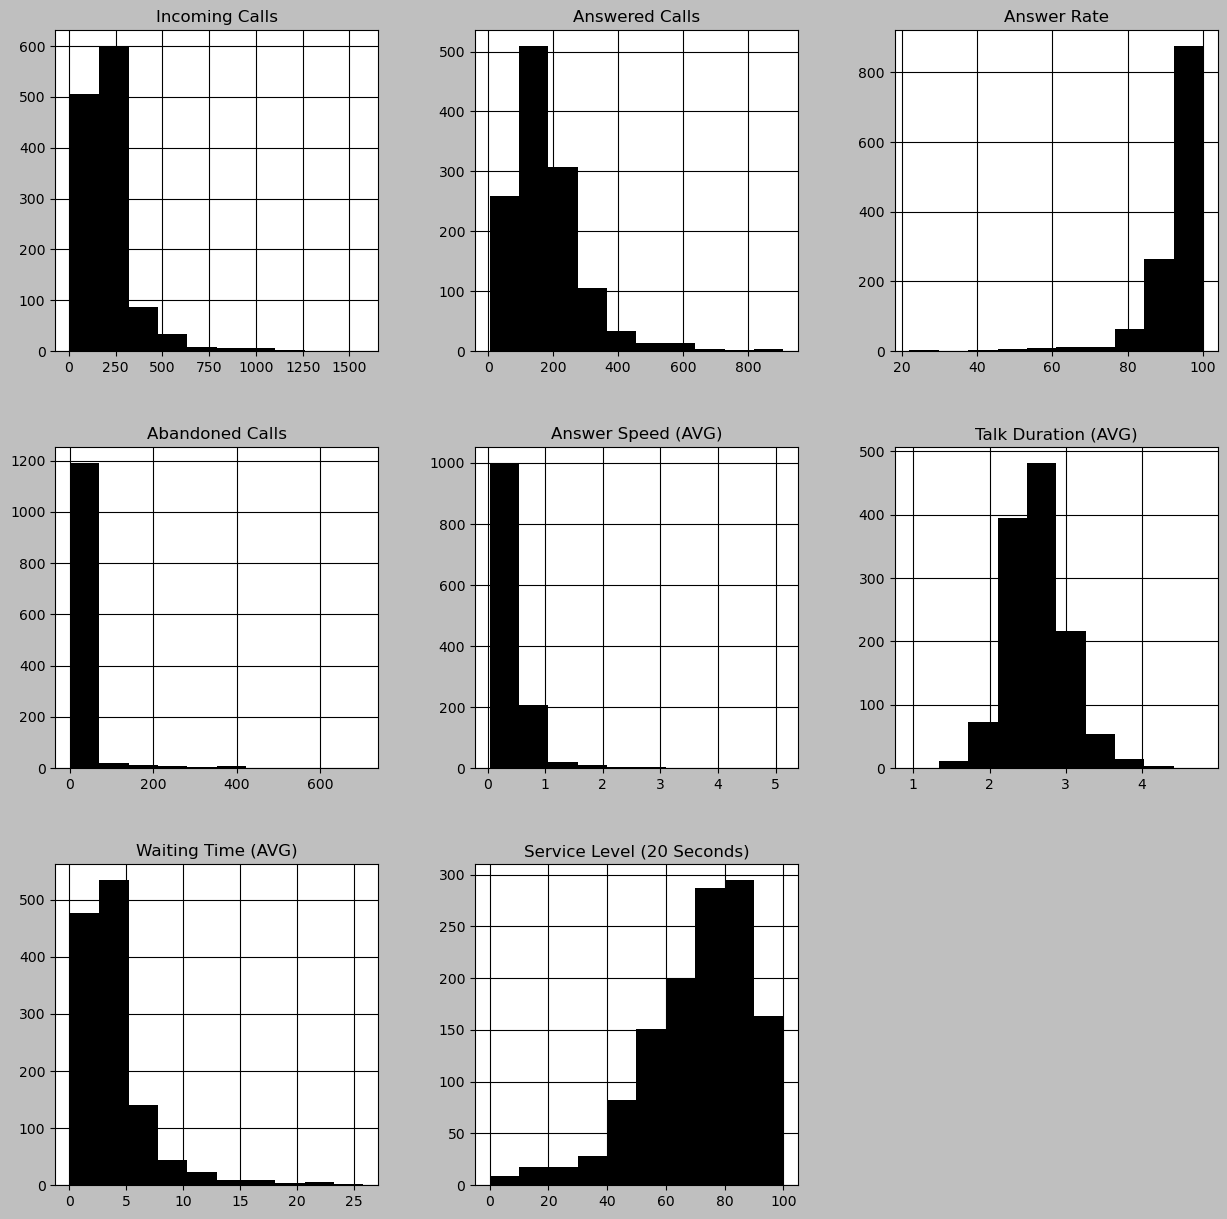

In [53]:
plt.style.use('grayscale')
df.hist(figsize=(15,15))

<AxesSubplot:>

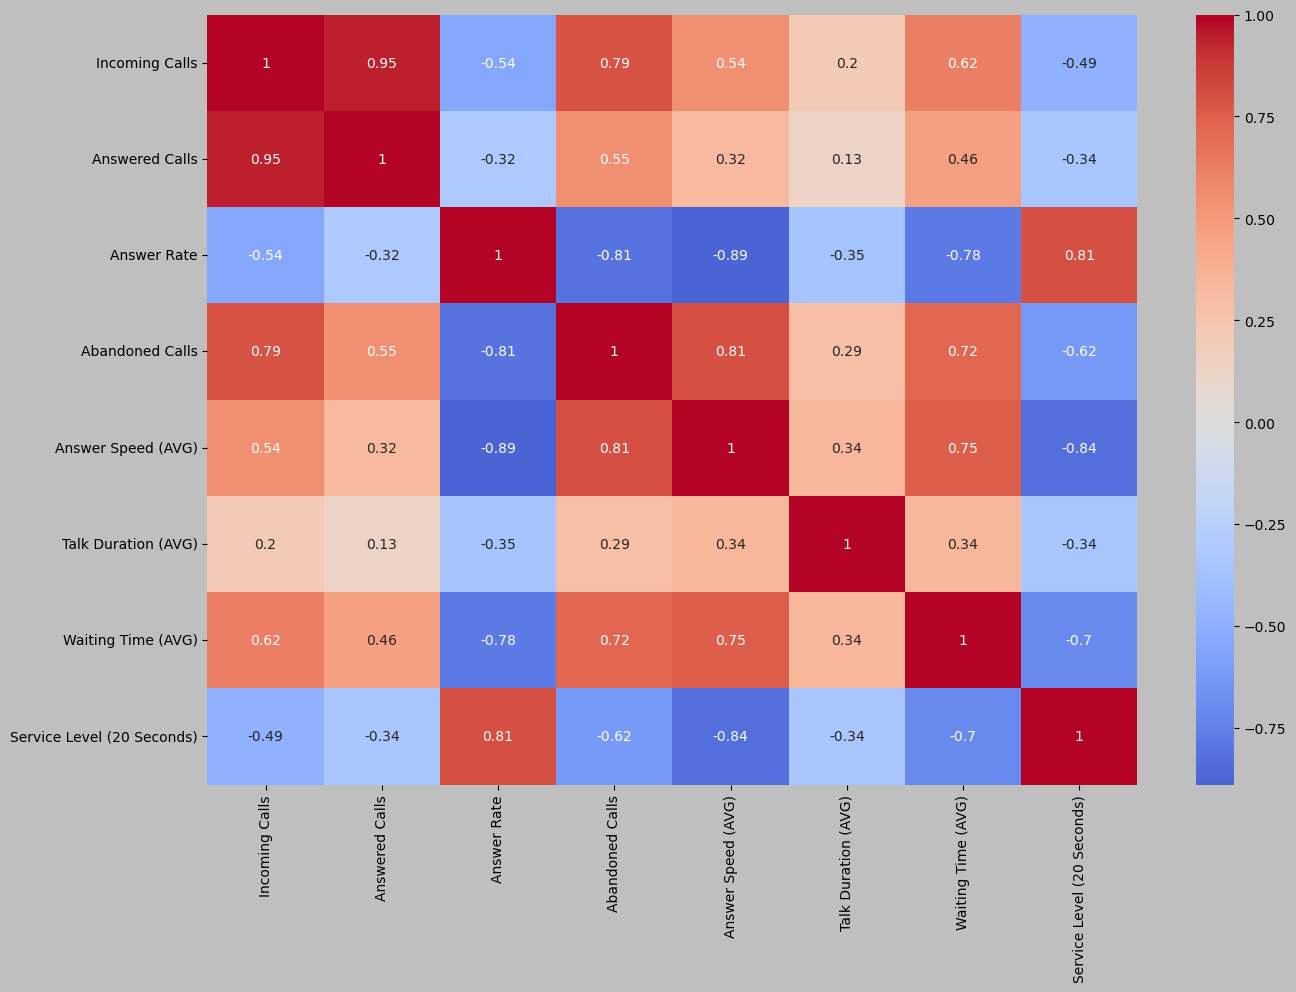

In [54]:
plt.figure(figsize=(15,10))
sns.color_palette("dark", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [56]:
x=np.array(df['Abandoned Calls']).reshape(-1,1)
y=np.array(df['Incoming Calls'])

reg=LinearRegression()
reg.fit(x,y)

reg=LinearRegression().fit(x,y)
r_sq=reg.score(x,y)
print(r_sq)
print(reg.intercept_)

0.6189713311477121
153.7671289303049


In [58]:
y_pred=reg.predict(x)
print(y_pred)

[180.59693777 190.91609502 190.91609502 ... 168.21394908 170.27778053
 155.83096038]


Text(0.5, 1.0, 'Incoming Calls and Abandonment')

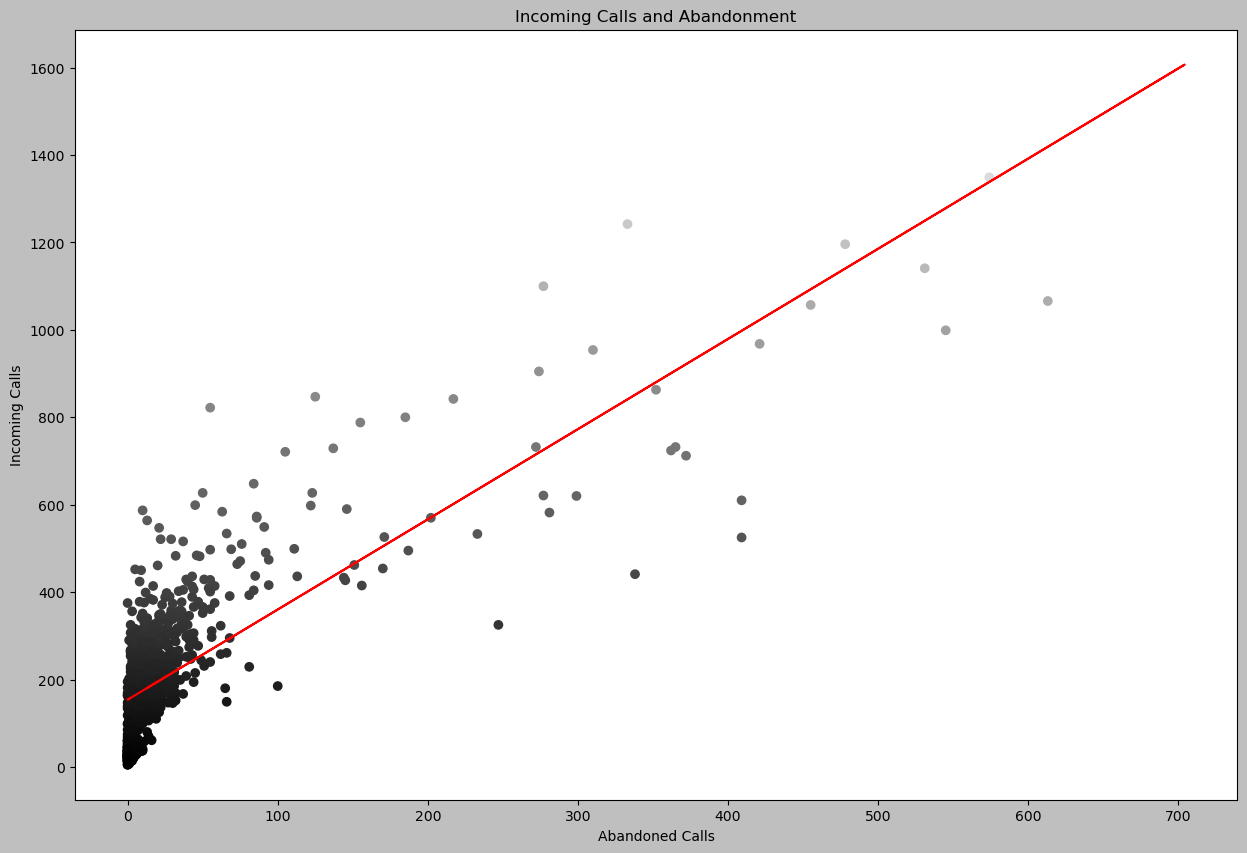

In [59]:
plt.figure(figsize=(15,10))
plt.scatter(x, y,c=y)
plt.plot(x, y_pred,c="red")
plt.xlabel('Abandoned Calls')
plt.ylabel('Incoming Calls')
plt.title('Incoming Calls and Abandonment')

In [60]:
#Multiple Regression
x1=df.drop(['Abandoned Calls'],axis=1).values
y1=df['Abandoned Calls'].values

x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)
model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print('y_pred = ',y_pred)

y_pred =  [ 5.00000000e+00  1.00000000e+00  1.00000000e+00  2.00000000e+01
  1.00000000e+00  1.00000000e+00  8.00000000e+00  3.20000000e+01
  2.00000000e+01  2.70000000e+01  7.00000000e+00  5.50000000e+01
  2.00000000e+00  1.10000000e+01  9.00000000e+00  4.00000000e+00
  3.10000000e+01  2.90000000e+01  1.00000000e+00  1.00000000e+01
  4.00000000e+00  4.40000000e+01  1.80000000e+01  1.00000000e+00
  1.45000000e+02  3.38000000e+02  5.40000000e+01  7.60000000e+01
  4.55000000e+02  1.60000000e+01  2.60000000e+01  2.70000000e+01
  9.00000000e+00  9.00000000e+00  3.00000000e+00  4.90000000e+01
  4.30000000e+01  2.00000000e+00  1.60000000e+01  2.10000000e+01
  7.00000000e+00  2.70000000e+01  1.05000000e+02  1.80000000e+01
  1.00000000e+00  8.00000000e+00  1.20000000e+01  1.20000000e+01
  3.00000000e+00  4.00000000e+00  6.00000000e+00  3.00000000e+00
  4.09000000e+02  4.00000000e+00  2.00000000e+00  5.57472612e-13
  9.00000000e+00  1.00000000e+00  5.00000000e+00  1.00000000e+01
  9.00000000e+0

1.0


Text(0.5, 1.0, 'Actual vs. Predicted Abandonment')

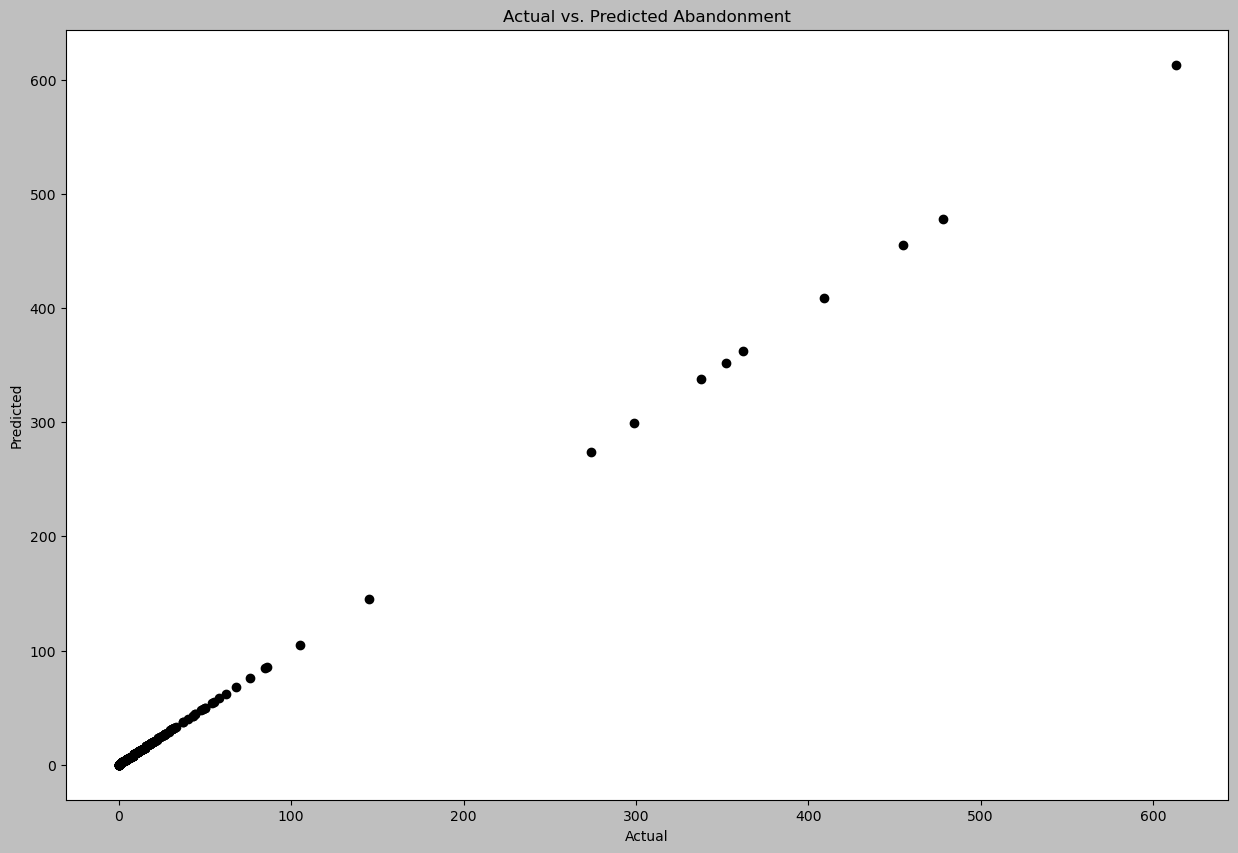

In [61]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
print(accuracy)

plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Abandonment')

Text(0, 0.5, 'Average Wait Time')

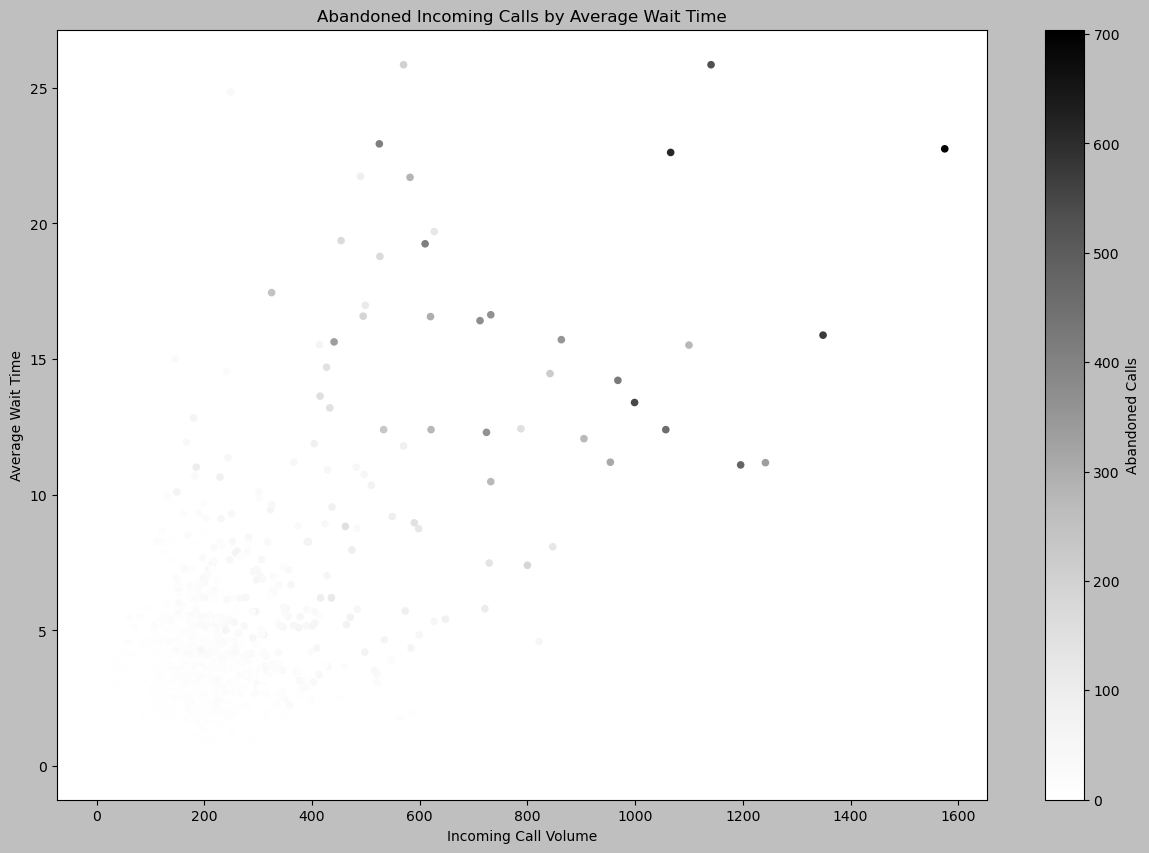

In [64]:
df.plot.scatter(x='Incoming Calls', y='Waiting Time (AVG)', c='Abandoned Calls', figsize=(15,10),sharex=False)
plt.title('Abandoned Incoming Calls by Average Wait Time')
plt.xlabel('Incoming Call Volume')
plt.ylabel('Average Wait Time')

Text(0.5, 1.0, 'SLA, ASA, and Abandoned Calls')

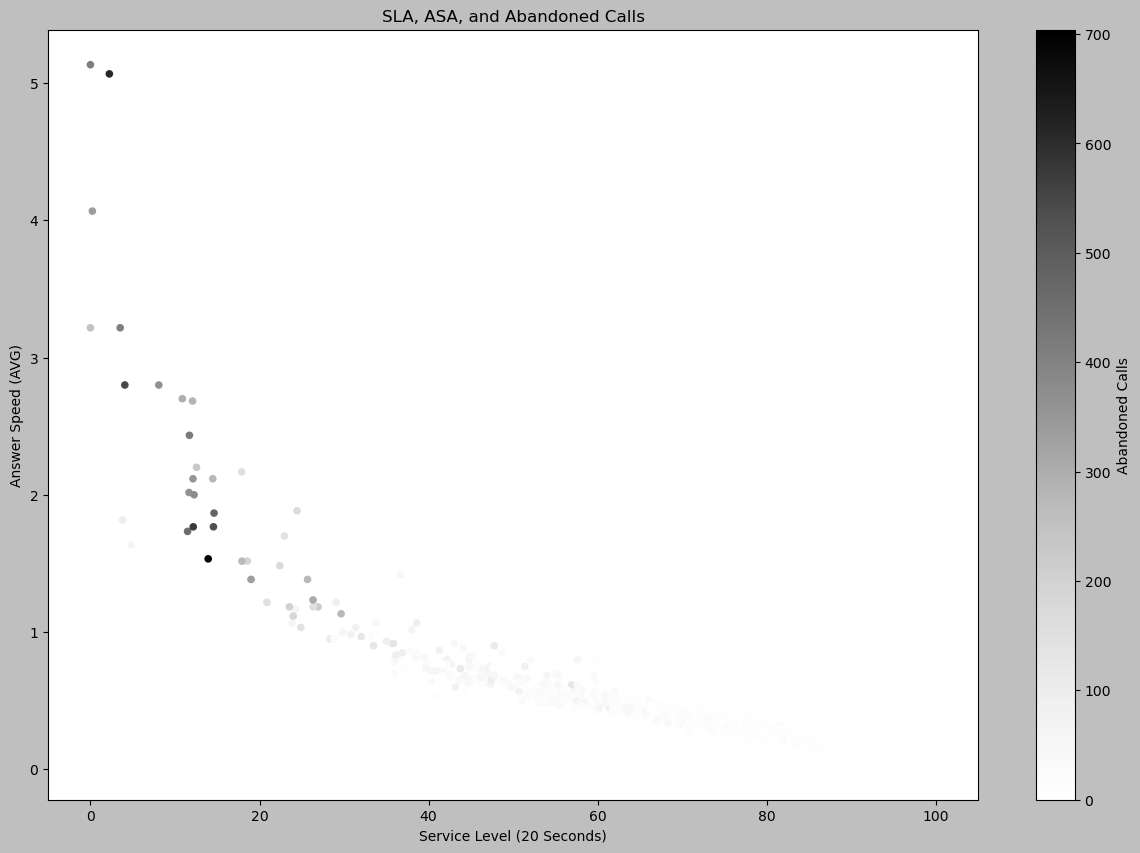

In [65]:
df.plot.scatter(x='Service Level (20 Seconds)', y='Answer Speed (AVG)', c='Abandoned Calls', figsize=(15,10), sharex=False)
plt.title('SLA, ASA, and Abandoned Calls')

Text(0.5, 1.0, 'Contacts By SLA')

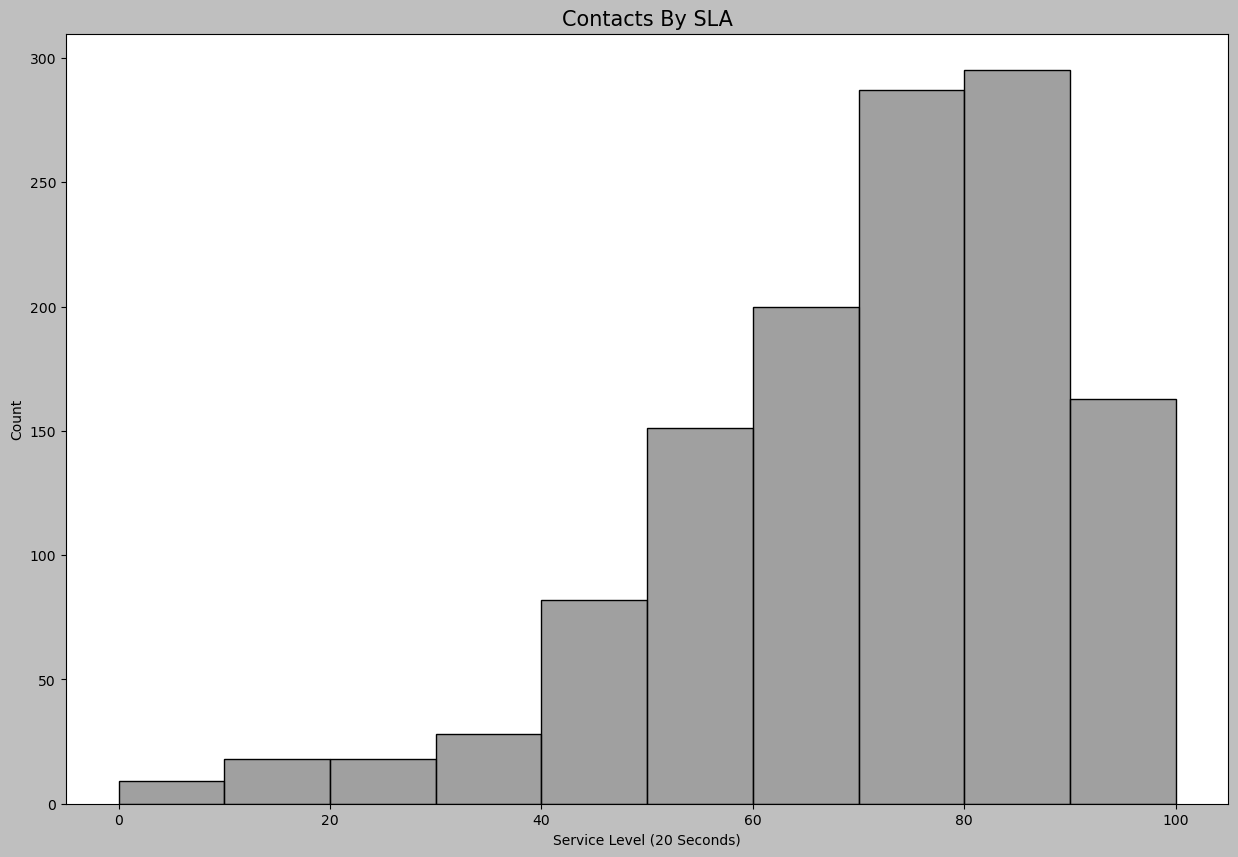

In [66]:
plt.figure(figsize=(15,10))
sns.histplot(df, x='Service Level (20 Seconds)', bins=10)
plt.title('Contacts By SLA', size=15)